# <center> Python Lesson 2: Remote Sensing Applications</center>

![](img/day2.jpg)

## Agenda
1. Creating maps using CartoPy
2. Importing netCDF datasets and attributes
3. Common map-related remote sensing tasks


## Objective: working with satellite datasets

* You won't learn how to code in Python
* You will learn to:
	* Read/write netCDF datasets
	* Plotting and visualizing the data
	* Perform re-gridding, merging, averaging, filtering

# Recap on Packages
Packages give us additional functionality, saving us the trouble of writing procedures ourselves. 

Primary libraries from the last session...
* [NumPy](http://www.numpy.org/) Fast mathemtatical operations on large datasets.
* [Pandas](https://pandas.pydata.org) Encapsulation of data, easy read/write of ascii data. Builds extra functionality on top of NumPy.
* [Matplotlib](https://matplotlib.org) Primarily python plotting/visualization package. You can generate plots, histograms, scatterplots, etc., with just a few lines of code.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

### Looking at real in-situ data: AERONET
* Aerosols are particles suspended in the atmosphere, including dust, sea salt, volcanic ash, smoke, and pollution.
* Aerosol Optical Depth (AOD) is a unitless measure of the amount of aerosols in the atmosphere.
* AERONET (AErosol RObotic NETwork) stations provide in-situ AOD observations.

In [2]:
# Bring back our list of aeronet stations...
url = 'data/aeronet_locations_v3.txt'
stationList = pd.read_csv(url, skiprows=1)
stationList.columns = ['site', 'lon', 'lat', 'elev']

## Basemap is dead &rarr; Use [CartoPy](https://scitools.org.uk/cartopy/)
* CartoPy is not included in Anaconda, need to install yourself.

Open the terminal (Mac/Linix) or Anaconda Prompt (Windows) and type:
```python
conda install -c conda-forge cartopy
```
* Rather than import all of CartoPy, we just want the projection classes to pair with matplot lib.
* More [map projections](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html).

In [3]:
from cartopy import crs as ccrs

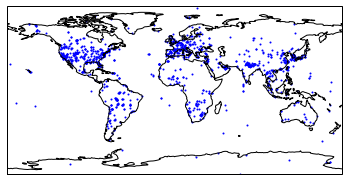

In [5]:
# Center on the Atlantic
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(stationList['lon'], stationList['lat'], color='blue', s=1)
plt.show()

<div class="alert alert-block alert-info">

# Exercise 1
* Import aeronet_locations_v3.txt with read_csv
* Define the map axes using with option projection=ccrs.PlateCarree()
* Add coastlines
* Make a scatter plot of the station locations
* Don't forget to show the plot!

* Challenge: Shift the plot to center on -180 using ccrs.PlateCarree(central_longitude=-180)
</div>

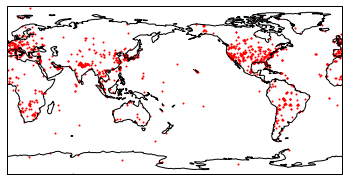

In [6]:
# Center on the Pacific (note the shift in the station longitude as well!)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))
ax.coastlines()
plt.scatter(stationList['lon']-180, stationList['lat'], color='red', s=1)
plt.show()

# Examining the 2018 California Wildfires from Space
* 6,870 fires had burned over a 6,000 km${^2}$ area. 
* The smoke from the wildfires also had an impact on air quality both in proximity of the fires as well as across the country.
* We'll look at satellite observations from JPSS and GOES-16 to show the impact of the California wildfires on AOD.

### LEO Example: NOAA-20
LEO Satellites orbit the earth many times a day, data are oganized in 5 minute swaths per file.

![](img/orbit_nov3.gif)


## Recap on netCDF4
netCDF files organize data into groups, which are organized like directories in a filesystem. The groups are containers for variables, dimensions and attributes. 

The netCDF4 package is included in Anaconda Python. The main function is Dataset, which reads from an existing file:
```
file_id = Dataset("test.nc", "r", format="NETCDF4")
```
You can choose to 'w' (write), 'r' (read), or 'a'

The foramts can be: NETCDF3_CLASSIC, NETCDF3_64BIT_OFFSET, NETCDF3_64BIT_DATA, NETCDF4_CLASSIC, and NETCDF4 (default)

In [8]:
from netCDF4 import Dataset

In [9]:
# Import your data...
file_id_N20 = Dataset('data/JRR-AOD_v1r1_npp_s201808091955538_e201808091957180_c201808092049460.nc')

# Print a list of variables
print(file_id_N20.variables.keys())

odict_keys(['Latitude', 'Longitude', 'StartRow', 'StartColumn', 'AOD550', 'AOD_channel', 'AngsExp1', 'AngsExp2', 'QCPath', 'AerMdl', 'FineMdlIdx', 'CoarseMdlIdx', 'FineModWgt', 'SfcRefl', 'SpaStddev', 'Residual', 'AOD550LndMdl', 'ResLndMdl', 'MeanAOD', 'HighQualityPct', 'RetrievalPct', 'QCRet', 'QCExtn', 'QCTest', 'QCInput', 'QCAll'])


In [10]:
AOD_N20 = file_id_N20.variables['AOD550'][:]
lat_N20 = file_id_N20.variables['Latitude'][:]
lon_N20 = file_id_N20.variables['Longitude'][:]

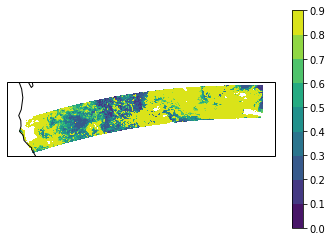

In [11]:
# Using cartopy, create the map projection and plot the data
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lon_N20, lat_N20, AOD_N20, np.arange(0,1,0.1), transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
plt.show()

<div class="alert alert-block alert-info">

# Exercise 2 

??? = Fill in the blanks!

## Import from netCDF files
* Import JRR-AOD_v1r1_npp_s201808091957192_e201808091958434_c201808092051240.nc using the Dataset command.
* Inpect the available variables.
* Save the latitude, longitude, and AOD to arrays.
* Convert to numpy arrays using np.arrays command.

## Create a CartoPy plot
* Define the axes, including the projection. 
    * Challenge: Make an ortographic plot using: ccrs.Orthographic(central_longitude=-75.0, central_latitude=0.0)
* Create a plot using plt.contourf(???, ???, ???, transform=ccrs.???)
    * Challenge: Change the data scale from the default to 0.0-1.0
* Remember to plt.show() at the end to display!

</div>

## Common tasks
1. Regridding
2. Masking datasets
3. Filtering with Quality Flags

### Regridding

There are a few options:
* Interpolate using griddata from SciPy package
* Regridding in iris package (autodetection of GRIB and NC fileformats... if they follow the conventions!)
* ESMF which is a wrapper for xarray (Unix only and kind of new)

In [ ]:
# Simple downscaling: take every other point
lonDownscl=lon_N20[::4,::4]
latDownscl=lat_N20[::4,::4]
AODDownscl=AOD_N20[::4,::4]

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lonDownscl, latDownscl, AODDownscl, levs, transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
plt.show()

In [ ]:
from scipy.interpolate import griddata

In [ ]:
# Existing grid/values
lon=np.array(lon_N20).flatten()
lat=np.array(lat_N20).flatten()

# Convert to numpy array, then you must flatten the 2D array into a 1D array
inpoints = (lon, lat)
invalues = np.array(AOD_N20).flatten()

In [ ]:
# New grid to project to
# Defining a new list of lat/lon coodinates that are spaced 0.5 degrees apart
outpoints = (np.round(lon, decimals=1), np.round(lat, decimals=1))

In [ ]:
# Using nearest neighnors method
outvalues = griddata(inpoints, invalues, outpoints, method='nearest')

In [ ]:
# Unflatten with re-shape
newAOD = outvalues.reshape(lon_N20.shape)
newLon = outpoints[0].reshape(lon_N20.shape)
newLat = outpoints[1].reshape(lon_N20.shape)

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(newLon, newLat, newAOD, levs)
ax.coastlines()
plt.colorbar()
plt.show()

### Masking Datasets

May want to add a land/ocean mask to our datasets

In [ ]:
import cartopy.feature as feature

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Mask out the ocean
ax.add_feature(feature.OCEAN, zorder=100, edgecolor='k')

# Uncomment to show entire globe instead of fitting to the data
#ax.set_global()

plot = ax.contourf(lon_N20, lat_N20, AOD_N20, levs, transform=ccrs.PlateCarree())
cb = plt.colorbar(plot)
plt.show()

### GEO Example: GOES-17
* Larger imagery (42% of earth), can take a while to load.
* Using CONUS datasets, but Full Disk Imagery is also available

![](img/satellites.gif)

### Un-scaling the data
* Data are often scaled integers to save disk space
* If the netCDF file is formatted properly, Python will unscale the data for you!

In [ ]:
file_id_G17 = Dataset('data/OR_ABI-L2-AODC-M3_G17_s20182211612186_e20182211614557_c20182211615551.nc')
var = file_id_G17.variables['AOD'][:]
AOD_G17 = np.array(var)

### Georeferencing the data

* GOES makes fixed observations, so the Ful Disk and CONUS files do not contain the lat/lon coordinates to save disc space (Mesoscale does contain lat/lon since the position changes).
* For the details on unscaling the geoference data (e.g. x, y &rarr; lon, lat), see the GOES-16 ATBD or run these scripts.
* For now, I provide the look-up tables so don't worry :-)

In [ ]:
# Import lat/lon from look-up table (code is on GitHub if you want to make your own)
file_id_geo = Dataset('data/latlon_L2_G17_CONUS_89W.nc')
lat_G17 = file_id_geo.variables['latitude'][:,:]
lon_G17 = file_id_geo.variables['longitude'][:,:]

In [ ]:
# Then you can plot just like before (this is a little slow):
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lon_G17, lat_G17, AOD_G17, levs, transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
plt.show()

### Filtering

* Remote sensing datasets commonly have "quality flags" to inform the user of uncertainly in the results.
* If you model or analysis is highly sensitive to the inputs, you should only use the bet quality data
* Quality flags are usually specified on a integer scale:
    * 0: Best
    * 1: Medium
    * 2: Low
    * 3: No retrieval

In [ ]:
# Import quality flag
dqf = file_id_G17.variables['DQF'][:]

# Keep all but the "best" quality using masked arrays
maskHQ = (dqf != 0)
AOD_G17_HQ = np.ma.masked_where(maskHQ, AOD_G17)

In [ ]:
# Re-plot only the "high quality" data
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lon_G17, lat_G17, AOD_G17_HQ, levs, transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
plt.show()

<div class="alert alert-block alert-info">

# Exercise 3
* Filter your plot in Exercise 2 by data quality using the variable 'QCAll'
* Import QCAll into a vairable
* Create a mask for medium/low quality data or pixels with no retrieval
* Make a new map with the filtered data

</div>

## Saving results

### Saving arrays or pandas dataframes
* I recommend using npz.save(), which will save it in a python-friendly binary format
* Allows faster read later, but cannot visually inspect the files

In [ ]:
np.savez("station_list", stationList)

### Saving as netCDF or HDF
* Steps are similar to how you open the file
* Try to follow [climate and forecast conventions](https://www.unidata.ucar.edu/software/netcdf/conventions.html)

In [ ]:
# Open the dataset in "write mode"
rootgrp = Dataset('viirs-AOD', "w", format="NETCDF4")

# Define the coordinates
latnc = rootgrp.createDimension("lat", lat_N20.shape[0])
lonnc = rootgrp.createDimension("lon", lon_N20.shape[1])

In [ ]:
# Create the latitude and longitude variables
latitudes = rootgrp.createVariable("latitude","f4",("lat","lon"), zlib=True, least_significant_digit=2)
longitudes = rootgrp.createVariable("longitude","f4",("lat","lon"), zlib=True, least_significant_digit=2)

# Create the groupname for the variable
variable = rootgrp.createVariable('AOD550', 'f4',("lat","lon"), zlib = True, fill_value = fill_val[var_name])

In [ ]:
# Fill in some Metadata
rootgrp.description = "High quality VIIRS AOD"
latitudes.units = "degrees_north"
longitudes.units = "degrees_east"
variable.long_name = "Aerosol Optical Depth"

In [ ]:
# Finally, fill in the variables
variable[:,:,:] = AOD_N20_HQ
latitudes[:,:] = lat_N20
longitudes[:,:] = lon_N20

In [ ]:
# If you do not close, the file will not be usable!
rootgrp.close()

## Scripting

* Notebooks are nice for sharing results with others, but scripts are useful for automating tasks.
* To make a script, copy code into a [filename].py file with the following shebang:
```python
#!/usr/bin/env python
```

Then to call the script, open the terminal, check the file permissions, and simply type:
```python
python rgb.py
```
On Windows, you'll need to run the scripts through the Anaconda Prompt.


## Closing up
I am available by email: rebekah.esmaili@gmail.com

* Some (free!) ways to learn: 
    * [Automate boring stuff](https://automatetheboringstuff.com)
    * [Codeacademy](https://www.codecademy.com/learn/learn-python)
    * [Local Meetups](https://www.meetup.com/find/tech/)
    * Start your own NOAA Python Club!

* Advanced resources:
    * PyTroll (http://pytroll.github.io) framework for the processing of earth observation satellite data.
    * [Workshop on developing Python frameworks for earth system sciences](https://www.ecmwf.int/en/learning/workshops/2018-workshop-developing-python-frameworks-earth-system-sciences) can view past lectures for free online.

Did you find this workshop helpful? Please fill out survey!

## Thank you!
I hope you enjoyed this crash course in python in remote sensing applications! Please fill out feedback, write as much as you can!